# Lista 14

In [13]:
import time
import matplotlib.pyplot as plt

In [14]:
def sievePrimes0(candidates):
	for i in range(0, int(len(candidates) ** 0.5 + 1)):
		currentPrime = candidates[i]
		if currentPrime != 0:
			for j in range(i + currentPrime, len(candidates), currentPrime):
				if candidates[j] % candidates[i] == 0:
					candidates[j] = 0
	return filter(lambda x : x != 0, candidates)

def sievePrimes1(l):
	if l[0] * l[0] <= l[len(l) - 1]:
		l[1:] = sievePrimes1(list(filter(lambda x: x % l[0] != 0, l)))
	return l

In [15]:
def timeSieve(maxPrime, numTimes, sieveFunc):
	t0 = 0
	for numTries in range(0, numTimes):
		taux = time.time()
		primes0 = sieveFunc(list(range(2, maxPrime)))
		t0 = t0 + time.time() - taux
	ttime = t0 / numTimes
	return ttime

In [16]:
def plotSieves():
	x = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
	y0 = []
	y1 = []
	for maxPrime in x:
		y0.append(timeSieve(maxPrime, 5, sievePrimes0))
		y1.append(timeSieve(maxPrime, 5, sievePrimes1))
	print ("y0: ", y0)
	print ("y1: ", y1)
	plt.plot(x, y0, 'r', x, y1, 'b')
	plt.show()


y0:  [5.865097045898438e-06, 1.02996826171875e-05, 1.8548965454101562e-05, 0.00011487007141113282, 0.00022788047790527343, 0.0012544155120849609, 0.002776432037353516, 0.019596624374389648, 0.036425304412841794, 0.15687661170959472]
y1:  [6.4373016357421875e-06, 2.6273727416992188e-05, 3.662109375e-05, 0.00024061203002929689, 0.0006011486053466797, 0.003537607192993164, 0.00813593864440918, 0.0957643985748291, 0.16410326957702637, 1.293116283416748]


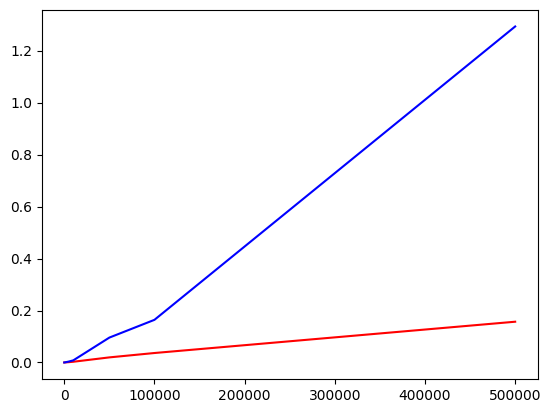

In [17]:
plotSieves()

In [18]:
def testPrimes():
	numTimes = int(input())
	for numTries in range(0, numTimes):
		maxPrime = int(input())
		sievePrimes0(list(range(2, maxPrime)))
		sievePrimes1(list(range(2, maxPrime)))

testPrimes()

In [19]:
def mystery(limit):
	nums = []
	for n in range(2, limit):
		for x in range(2, n):
			if n % x == 0:
				print("a")
				break
		else:
			print("b")
			nums.append(n)
	return nums

print (mystery(3))

b
[2]


In [20]:
def pydiv(n, d):
	if d != 0:
		return n / d

In [21]:
x = pydiv(1, 0)
print (x)
y = pydiv(1, 1)
print (y)

None
1.0


Both cells below have the same functionality, but the first one is more readable and the second one is more compact.

In [22]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	else:
		if len(l) != n:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n, auxl)
				for j in aux:
					if j not in perml:
						perml.append(j)
		else:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n - 1, auxl)
				for j in aux:
					if [l[i]] + j not in perml:
						perml.append([l[i]] + j)

	return perml

In [23]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	for i in range(0, len(l)):
		auxl = l.copy()
		auxl.remove(auxl[i])
		nn = n
		if len(l) == n:
			nn -= 1
		p = perm(nn, auxl)
		for j in p:
			aux = j
			if len(l) == n:
				aux = [l[i]] + aux
			if aux not in perml:
				perml.append(aux)
	return perml

In [24]:
x = perm(2, ['a', 'b', 'c', 'd', 'e'])
x

[['d', 'e'],
 ['e', 'd'],
 ['c', 'e'],
 ['e', 'c'],
 ['c', 'd'],
 ['d', 'c'],
 ['b', 'e'],
 ['e', 'b'],
 ['b', 'd'],
 ['d', 'b'],
 ['b', 'c'],
 ['c', 'b'],
 ['a', 'e'],
 ['e', 'a'],
 ['a', 'd'],
 ['d', 'a'],
 ['a', 'c'],
 ['c', 'a'],
 ['a', 'b'],
 ['b', 'a']]

In [25]:
def getStringList(i):
	l = list(map(str, str(i)))
	while len(l) != 4:
		l = ['0'] + l
	return l

In [26]:
def distinctDigits(l):
	for i in range(0, len(l)):
		for j in range(i + 1, len(l)):
			if l[i] == l[j]:
				return False
	return True
	

In [27]:
def getPrimePermutations(perml, primes):
	primePerm = []
	for i in range(len(perml) - 1, -1, -1):
		numStr = ''
		for j in range(0, len(perml[i])):
			numStr += perml[i][j]
		num = int(numStr)
		if num in primes:
			primePerm.append(num)
	return primePerm

In [28]:
def findAP(primePerm):
	for i in range(0, len(primePerm)):
		for j in range(i + 1, len(primePerm)):
			for k in range(j + 1, len(primePerm)):
				if abs(primePerm[j] - primePerm[i]) == abs(primePerm[k] - primePerm[j]):
					return [primePerm[i], primePerm[j], primePerm[k]]
	return []

In [29]:
def isInList(n, l):
	for i in l:
		if n in i:
			return True
	return False

In [30]:
def findSequences():
	sequences = []
	primes = sievePrimes1(list(range(2, 10000)))
	for p in primes:
		l = getStringList(p)
		if not distinctDigits(l):
			continue
		perml = perm(4, l)
		primePerm = getPrimePermutations(perml, primes)
		apPerm = findAP(primePerm)
		if len(apPerm) > 0:
			if not isInList(apPerm[0], sequences):
				sequences.append(apPerm)
	return sequences


In [31]:
findSequences()

[[1063, 613, 163], [7039, 3709, 379], [8147, 4817, 1487]]

# Lista 15

First-Fit

Given by the exercise

In [37]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL
    while p != NULL and self.memory[p] < size:
      lag = p
      p = self.memory[p + 1]
    if p == NULL:
      raise MemoryError()
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
    """Deallocates the block of data that starts at address. This works only
       if the block address is one that was returned by allocate and has not
       yet been deallocated."""
    addr = address - 1
    self.memory[addr + 1] = self.freeStart
    self.freeStart = addr

In [33]:
def test():
  h = HeapManager([0 for x in range(0, 10)])
  print("Memory = ", h.memory)
  a = h.allocate(4)
  print("a = ", a, ", Memory = ", h.memory)
  b = h.allocate(1)
  print("b = ", b, ", Memory = ", h.memory)
  h.deallocate(a)
  c = h.allocate(2)
  print("c = ", c, ", Memory = ", h.memory)

test()

Memory =  [10, -1, 0, 0, 0, 0, 0, 0, 0, 0]
a =  1 , Memory =  [5, -1, 0, 0, 0, 5, -1, 0, 0, 0]
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 3, -1, 0]
c =  1 , Memory =  [3, 7, 0, 2, 7, 2, -1, 3, -1, 0]


Best-Fit

In [34]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL

    pArray = []
    while p != NULL:
      lag = p
      pArray.append(p)
      p = self.memory[p + 1]
    if len(pArray) == 0:
      raise MemoryError()
    bestLag = NULL
    bestP = pArray[0]
    bestFree = 0
    for i in range(1, len(pArray)):
      bestFree = self.memory[bestP] - size
      if bestFree == 0:
        break
      if bestFree < 0:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
        bestFree = self.memory[bestP] - size
        continue
      iFree = self.memory[pArray[i]] - size
      if iFree < 0:
        continue
      if bestFree > iFree:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
    if bestFree < 0:
      raise MemoryError()
    p = bestP
    lag = bestLag
	
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
      """Deallocates the block of data that starts at address. This works only
      if the block address is one that was returned by allocate and has not
      yet been deallocated."""
      addr = address - 1
      self.memory[addr + 1] = self.freeStart
      self.freeStart = addr

In [38]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
print("Memory = ", mm.memory)
a = mm.allocate(4)
print("a = ", a, ", Memory = ", mm.memory)
b = mm.allocate(1)
print("b = ", b, ", Memory = ", mm.memory)
c = mm.allocate(3)
print("c = ", c, ", Memory = ", mm.memory)
mm.deallocate(c)
print("Memory = ", mm.memory)
mm.deallocate(a)
print("Memory = ", mm.memory)
d = mm.allocate(1)
print("d = ", d, ", Memory = ", mm.memory)
e = mm.allocate(2)
print("e = ", e, ", Memory = ", mm.memory)
f = mm.allocate(3)
print("f = ", f, ", Memory = ", mm.memory)

Memory =  [11, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a =  1 , Memory =  [5, -1, 0, 0, 0, 6, -1, 0, 0, 0, 0]
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
c =  8 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, 7, 0, 0, 0, 2, -1, 4, -1, 0, 0]
d =  1 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
e =  3 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
f =  8 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]


In [39]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
a = mm.allocate(4)
b = mm.allocate(1)
c = mm.allocate(3)
mm.deallocate(c)
mm.deallocate(a)
d = mm.allocate(1)
e = mm.allocate(2)
f = mm.allocate(3)

# Lista 16

Given by the exercise

In [8]:
class ConsCell:
  def __init__(self, h, t):
    """Creates a new cell with head == h, and tail == t."""
    self.head = h
    self.tail = t

class List:
	"""Describes a simple list data type."""

	def __init__(self, n):
		"""creates a new list with n as the first element."""
		self.start = n

	def cons(self, e):
		"""Adds a new element into the list; hence, procuding a new list."""
		return List(ConsCell(e, self.start))

	def length(self):
		"""Returns the number of elements in the list."""
		len = 0
		cell = self.start
		while cell != 0:
			len += 1
			cell = cell.tail
		return len

	# 1-a) Add method contains
	def contains(self, n):
		cell = self.start
		while cell != 0:
			if cell.head == n:
				return True
			cell = cell.tail
		return False

	# 1-b) Add method equals
	def equals(self, y):
		if self.length() != y.length():
			return False
		xCell = self.start
		yCell = y.start
		while xCell != 0:
			if xCell.head != yCell.head:
				return False
			xCell = xCell.tail
			yCell = yCell.tail
		return True

	# 1-c) Add method append
	def append(self, y):
		w = List(0)
		xCell = self.start
		while xCell != 0:
			w = w.cons(xCell.head)
			xCell = xCell.tail
		wCell = w.start
		while wCell != 0:
			y = y.cons(wCell.head)
			wCell = wCell.tail
		return y

	# 1-d) Add method reverse
	def reverse(self):
		w = List(0)
		xCell = self.start
		while xCell != 0:
			w = w.cons(xCell.head)
			xCell = xCell.tail
		return w

	# Updated append method:
	def append2(self, y):
		w = self.reverse()
		wCell = w.start
		while wCell != 0:
			y = y.cons(wCell.head)
			wCell = wCell.tail
		return y

	# 1-e) Add method reverseMe that does not return anything
	def reverseMe(self):
		w = self.reverse()
		self.start = w.start

	def reverseMeInPlace(self):
		w = self.start
		x = 0
		while w != 0:
			aux = w.tail # In list (1, (2, 3)), aux = (2, 3)
			w.tail = x # w = (1, 0)
			x = w # x = (1, 0)
			w = aux # w = (2, 3)

			# Second iteration, aux receives 3, w = (2, (1, 0)) and x = (2, (1, 0)), then w = 3, so that in the last iteration, x = (3, (2, (1, 0)))

		self.start = x

	# 1-f) Add method sort, passing the comparison function as a parameter
	def sort(self, f):
		x = self.start
		for i in range(0, self.length()):
			w = List(0)
			aux = x.tail
			while x != 0:
				if type(aux) != int:
					if f(aux.head, x.head):
						w = w.cons(aux.head) # Creating the list in reverse
						aux = aux.tail
					else:
						w = w.cons(x.head)
						x = aux
						aux = x.tail
				else:
					w = w.cons(x.head)
					x = aux
			x = w.reverse().start
		return List(x)

	# 1-g) Add method sortMe, that sorts in place without creating new ConsCells
	def sortMe(self, f):
		for i in range(0, self.length()):
			w = self.start
			x = 0
			while w != 0:
				aux = w.tail
				w.tail = x
				if type(aux) != int:
					if f(aux.head, w.head):
						aux2 = w.head
						w.head = aux.head
						aux.head = aux2
				x = w
				w = aux
			self.start = x
			self.reverseMeInPlace()
			
	# 1-h) Add recursive append, in more of a functional style
	def rAppend(self, y):
		if self.start == 0:
			return y
		else:
			return List(self.start.tail).rAppend(y).cons(self.start.head)
	

	


	def __str__(self):
		"""Returns a textual representation of this list."""
		ans = "["
		cell = self.start
		while cell != 0:
			ans = ans + repr(cell.head)
			cell = cell.tail
			if cell != 0:
				ans = ans + ", "
		ans = ans + "]"
		return ans


In [41]:
def test(): # Already written tests
	a = List(0)
	b = a.cons(2)
	c = b.cons("Hi!")
	d = b.cons(True)
	e = d.cons(False)
	print ("List a = ", a.__str__(), " Length(a) = ", a.length())
	print ("List b = ", b.__str__(), " Length(b) = ", b.length())
	print ("List c = ", c.__str__(), " Length(c) = ", c.length())
	print ("List d = ", d.__str__(), " Length(d) = ", d.length())
	print ("List e = ", e.__str__(), " Length(e) = ", e.length())

In [42]:
test()

List a =  []  Length(a) =  0
List b =  [2]  Length(b) =  1
List c =  ['Hi!', 2]  Length(c) =  2
List d =  [True, 2]  Length(d) =  2
List e =  [False, True, 2]  Length(e) =  3


In [2]:
def test2():
	a = List(0)
	b = a.cons(2)
	c = b.cons("Hi!")
	d = b.cons(True)
	e = d.cons(False)
	f = c
	print(b.contains(2))
	print(c.equals(f), c.equals(d))
	print(e.append(c).__str__())
	print(e.reverse().__str__())
	print(e.append2(c).__str__())
	e.reverseMe()
	e.reverseMeInPlace()
	print(e.__str__())
	g = List(0)
	g = g.cons(3)
	g = g.cons(1)
	g = g.cons(5)
	g = g.cons(7)
	g = g.cons(2)
	# g = g.cons(4)
	print(g.__str__())
	# g.sortMe(lambda x, y: x < y)
	# print(g.__str__())
	print(g.sort(lambda x, y: x < y).__str__())
	
	# Create list h = [2, 5, 6, 1, 9, 21, 52, 11, 13]
	h = List(0)
	h = h.cons(13)
	h = h.cons(11)
	h = h.cons(52)
	h = h.cons(21)
	h = h.cons(9)
	h = h.cons(1)
	h = h.cons(6)
	h = h.cons(5)
	h = h.cons(2)
	print(h.__str__())
	# h.sortMe(lambda x, y: x > y)
	# print(h.__str__())
	print(h.sort(lambda x, y: x > y).__str__())

	print(h.rAppend(g).__str__())

In [9]:
test2()

True
True False
[False, True, 2, 'Hi!', 2]
[2, True, False]
[False, True, 2, 'Hi!', 2]
[False, True, 2]
[2, 7, 5, 1, 3]
[1, 2, 3, 5, 7]
[2, 5, 6, 1, 9, 21, 52, 11, 13]
[52, 21, 13, 11, 9, 6, 5, 2, 1]
[2, 5, 6, 1, 9, 21, 52, 11, 13, 2, 7, 5, 1, 3]


# Given by the exercise

In [67]:
class Worklist:
  """Describes a simple list data type."""

  def add(self, element):
    """Adds a new element into this list."""

  def remove(self):
    """Removes the next element from this list."""

  def hasMore(self):
    """Returns True if this list is not empty."""

class Node:
	"""The node that must be inserted into the different lists."""
	def __init__(self):
		self.n = 0	
		self.e = ''

class Stack:
  """Describes a stack data type."""

  def __init__(self):
    self.top = Node()

  def add(self, element):
    """Adds a new element into this list."""
    self.top.e = element
    aux = Node()
    aux.n = self.top
    self.top = aux

  def remove(self):
    """Removes the next element from this list."""
    self.top = self.top.n
    return self.top.e

  def hasMore(self):
    """Returns True if this list is not empty."""
    return (self.top.n != 0)

def removeAll(s):
  """Removes all the elements from the data structure."""
  while (s.hasMore()):
    print(s.remove())

In [20]:
# 2-a) Implement a linked list Queue, first-in first-out, with the same methods as Stack
class Queue:

	def __init__(self):
		self.top = Node()
	
	def add(self, element):
		self.top.e = element
		aux = Node()
		aux.n = self.top
		self.top = aux

	def remove(self):
		aux = self.top
		if aux.n != 0:
			while aux.n.n != 0:
				aux = aux.n
			e = aux.n.e
			aux.n = 0
		return e

	def hasMore(self):
		return (self.top.n != 0)

In [21]:
a = Queue()
a.add(1)
a.add(2)
a.add(3)
a.add(4)
a.add(5)
print(a.remove())
removeAll(a)

1
2
3
4
5


In [57]:
# 2-b) Implement a linked list Priority Queue, lexicographically ordered, with the same methods as Stack, can edit class Node, without breaking class Stack
class PriorityQueue:

	def __init__(self):
		self.top = Node()
	
	def add(self, element):
		self.top.e = element
		aux = Node()
		aux.n = self.top
		self.top = aux

	def remove(self):
		if self.top.n == 0:
			return None
		aux = self.top.n
		prev = self.top
		s = aux
		while aux.n != 0:
			if aux.n < s:
				s = aux.n
				prev = aux
			aux = aux.n
		prev.n = s.n
		return s.e

	def hasMore(self):
		return (self.top.n != 0)
		
class Node:
	"""The node that must be inserted into the different lists."""
	def __init__(self):
		self.n = 0	
		self.e = ''

	def __lt__(self, otherNode):
		return str(self.e) < str(otherNode.e)

In [66]:
a = PriorityQueue()
a.add(3)
a.add(2)
a.add(4)
a.add(1)
a.add(5)
print(a.remove())
removeAll(a)

1
2
3
4
5


In [ ]:
# 2-c) Which alterations would be needed to implement a Priority Queue that is ordered by the value of the integer n?

# class Node:
# 	"""The node that must be inserted into the different lists."""
# 	def __init__(self):
# 		self.n = 0	
# 		self.e = ''

# 	def __lt__(self, otherNode):
# 		return str(self.e) < str(otherNode.e) -> The castings to string must be removed 
# 		return self.n < otherNode.n -> The comparison must be done by the integer n


In [ ]:
# 2-d) Consider this method remove:

	# def removeAll(s):
		# """Removes all the elements from the data structure."""
		# while (s.hasMore()):
		# print s.remove()

# i- What is the contract that must be garanteed by elements s passed as parameter?

	# The ADT of s must have the methods hasMore and remove

# ii- Look up the meaning of the expression "duck typing". How does it apply to this method?

	# Duck typing means that s should support all method signatures expected from it in removeAll function, so that it can be used in the function, which is the contract that must be garanteed by elements s passed as parameter

In [ ]:
# 3- Write class Int with the following components:

	# a) A field to store an integer
	# b) A constructor that receives an integer and creates a new instance of Int with that value
	# c) A method plus that receives an Int and returns a new Int with the sum of the two integers
	# d) A method toString that returns a string representation of the integer
	# e) Methods minus, times and div. Div should be an integer division, that is, 5 div 2 = 2
	# f) A Method isPrime that returns True if the integer is prime, and False otherwise

In [80]:
class Int:

	def __init__(self, n):
		self.n = n

	def plus(self, otherInt):
		return Int(self.n + otherInt.n)

	def toString(self):
		return str(self.n)

	def minus(self, otherInt):
		return Int(self.n - otherInt.n)

	def times(self, otherInt):
		return Int(self.n * otherInt.n)

	def div(self, otherInt):
		return Int(self.n // otherInt.n)

	def isPrime(self):
		if self.n == 1:
			return False
		for i in range(2, self.n):
			if self.n % i == 0:
				return False
		return True


In [81]:
a = Int(5)
b = Int(2)
print(a.plus(b).toString())
print(a.minus(b).toString())
print(a.times(b).toString())
print(a.div(b).toString())
print(Int(1).isPrime())
print(Int(2).isPrime())
print(Int(4).isPrime())

7
3
10
2
False
True
False


# Lista 17

Given by the exercise

In [85]:
class Node:
	def __init__(self):
		self.data = ''
		self.link = 0

class Stack:
	def __init__(self):
		self.top = Node()

def add(s, data):
	n = Node()
	n.data = data
	n.link = s.top
	s.top = n

def hasMore(s):
	return s.top.link != 0

def remove(s):
	n = s.top
	s.top = n.link
	return n.data

def test():
	s = Stack()
	add(s, "AA")
	add(s, 0)
	while (hasMore(s)):
		print(remove(s))	

In [86]:
test()

0
AA


In [ ]:
# 1-a) Why does the program not follow OOP characteristics?

	# Class Stack and Node only stores data, they have no behaviour, which is the main characteristic of OOP

In [87]:
# 1-b) Rewrite the program in an object-oriented style

class Node:
	def __init__(self):
		self.data = ''
		self.link = 0

class Stack:
	def __init__(self):
		self.top = Node()

	def add(self, data):
		n = Node()
		n.data = data
		n.link = self.top
		self.top = n

	def hasMore(self):
		return self.top.link != 0

	def remove(self):
		n = self.top
		self.top = n.link
		return n.data

def test():
	s = Stack()
	add(s, "AA")
	add(s, 0)
	while (hasMore(s)):
		print(remove(s))

In [88]:
test()

0
AA


In [99]:
# 2- Look at the program and write what will happen on each enumerated line

class Animal:
	atrb_animal = 0

	def __init__(self, name):
		self.name = name

	def __str__(self):
		return self.name + " is an animal"

	def eat(self):
		print(self.name + ", which is an animal, is eating.")

class Mammal(Animal):
	def __str__(self):
		return self.name + " is a mammal"

	def suckMilk(self):
		print(self.name + ", which is a mammal, is sucking milk.")

class Dog(Mammal):
	def __str__(self):
		return self.name + " is a dog"

	def bark(self):
		print(self.name + " is barking rather loudly.")

	def eat(self):
		print(self.name + " barks when it eats.")
		self.bark

def test():
	a1 = Animal("Tigrinho")
	a2 = Mammal("Oncinha")
	a3 = Dog("Mameluco")
	print(a1) # 1 Tigrinho is an animal.
	print(a2) # 2 Oncinha is a mammal.
	print(a3) # 3 Mameluco is a dog.
	a1.eat() # 4 Tigrinho, which is an animal, is eating.
	a2.suckMilk() # 5 Oncinha, which is a mammal, is sucking milk.
	a2.eat() # 6 Oncinha, which is an animal, is eating.
	a3.bark() # 7 Mameluco is barking rather loudly.
	a3.suckMilk() # 8 Mameluco, which is a mammal, is sucking milk.
	a3.eat() # 9 Mameluco barks when it eats.
	a1.bark() # 10 Animals cannot bark, error
	a1 = a3
	a1.bark() # 11 Mameluco is barking rather loudly


In [100]:
test()

Tigrinho is an animal
Oncinha is a mammal
Mameluco is a dog
Tigrinho, which is an animal, is eating.
Oncinha, which is a mammal, is sucking milk.
Oncinha, which is an animal, is eating.
Mameluco is barking rather loudly.
Mameluco, which is a mammal, is sucking milk.
Mameluco barks when it eats.


AttributeError: 'Animal' object has no attribute 'bark'

In [ ]:
# Exercises 3-4 are in Java

In [ ]:
# 5- In Java, we can use the static type of passed parameters to decide which method to call. For example, the class of the previous exercise:

# public class Avatar {
# 	public void buy(Knife k) { System.out.println("Avatar bought a knife"); }
# 	public void buy(Sword s) { System.out.println("Avatar bought a sword"); }
# 	
	# public static void main(String args[]) {
	# 	Avatar a = new Avatar();
	# 	Knife k = new Knife();
	# 	Sword s = new Sword();
	# 	a.buy(k);
	# 	a.buy(s);
# 	}
# }

In [ ]:
# 5-a) Why is this strategy not possible in Python?

	# Python is a dynamically typed language, so the type of the parameters is only known at runtime, so it is not possible to decide which method to call at compile time

In [ ]:
# 5-b) How can the program above be rewritten in Python? It is not possible to create an identical program, but you can try to emulate the same behaviour. (Lista17/4/SpiderAv.java)

# Translation of the Java code to Python:

# class Avatar:
# 	def buy(self, k):
# 		print("Avatar bought a knife")

# 	def buy(self, s):
# 		print("Avatar bought a sword")

# class Knife:
# 	def isBoughtBy(self, a):
# 		a.buy(self)

# class Sword:
# 	def isBoughtBy(self, a):
# 		a.buy(self)

# class SpiderAv(Avatar):
# 	def buy(self, k):
# 		print("SpiderAvatar bought a knife")

# 	def buy(self, s):
# 		print("SpiderAvatar bought a sword")

# def test():
# 	a1 = Avatar()
# 	a2 = SpiderAv()
# 	sa = SpiderAv()
# 	ks = Sword()
# 	a1.buy(ks)
# 	a2.buy(ks)
# 	sa.buy(ks)
# 	ks.isBoughtBy(a1)
# 	ks.isBoughtBy(a2)
# 	ks.isBoughtBy(sa)

In [ ]:
# Exercises 6-7 are in Java

In [ ]:
# 7- Answer:

	# No, both calls have the same efficiency, because to call the method, the program must first go to the object's vTable, and then to the method's address, so the number
	# of steps is the same, in O(1)

In [ ]:
# 8- This exercise is similar to the last one, but using Python instead of Java. Consider the following program:

class Animal:
	atrb_animal = 0

	def __init__(self, name):
		self.name = name
	
	def eat(self):
		print "Eating. Yummy, yummy!!!"

class Mammal(Animal):
	pass

def test():
	a1 = Animal("Tigrinho")
	a2 = Mammal("Oncinha")
	# Chamada 1:
	a1.eat()
	# Chamada 2:
	a2.eat()

# Is there a diffence in efficiency between the two calls? Why?

	# 

# Lista 18

In [1]:
class Staff:
	payroll = {}

	def getSalary(self, name):
		if self.payroll.has_key(name):
			return self.payroll[name]
		else:
			return 0.0
	
	def addEmp(self, name, salary):
		self.payroll[name] = salary
	
	def raiseSalary(self, name, salary):
		self.payroll[name] = self.payroll[name] + salary

# 1-a) The getSalary method uses a special value 0.0 as the salary of a non existent employee.
# What is the disadvantage of this error treatment method?

	# You would not be able to know if an employee does not exist or if he actually has a salary of 0.0.
	# In this case, it should not pose any problems, since employees have to have a salary, but in other
	# cases, it could be a problem

# 1-b) Create the NonExistentEmployee exception

class NonExistentEmployee(Exception):
	def __init__(self, msg):
		self.value = msg

	def __str__(self):
		return repr(self.value)


# 1-c) Modify getSalary to raise NonExistentEmployee exception

class Staff:
	payroll = {}

	def getSalary(self, name):
		if name in self.payroll:
			return self.payroll[name]
		else:
			raise NonExistentEmployee("There is no employee with the name " + name)
	
	def addEmp(self, name, salary):
		self.payroll[name] = salary
	
	def raiseSalary(self, name, salary):
		self.payroll[name] = self.payroll[name] + salary

# 1-d) Create the NegativeSalary exception, instances of this class must have attributes name and salary

class NegativeSalary(Exception):
	def __init__(self, name, salary, msg):
		self.name = name
		self.salary = salary
		self.value = msg

	def __str__(self):
		return repr(self.value)

# 1-d) Modify addEmp to raise NegativeSalary exception

class Staff:
	payroll = {}

	def getSalary(self, name):
		if name in self.payroll:
			return self.payroll[name]
		else:
			raise NonExistentEmployee("There is no employee with the name " + name)
	
	def addEmp(self, name, salary):
		if salary < 0:
			raise NegativeSalary(name, salary, "Tried to enter a negative salary to " + name)
		self.payroll[name] = salary
	
	def raiseSalary(self, name, salary):
		self.payroll[name] = self.payroll[name] + salary

# 1-f) Modify raiseSalary to handle both NonExistentEmployee and NegativeSalary exceptions

class Staff:
	payroll = {}

	def getSalary(self, name):
		if name in self.payroll:
			return self.payroll[name]
		else:
			raise NonExistentEmployee("There is no employee with the name " + name)
	
	def addEmp(self, name, salary):
		if salary < 0:
			raise NegativeSalary(name, salary, "Tried to enter a negative salary to " + name)
		self.payroll[name] = salary
	
	def raiseSalary(self, name, salary):
		if name not in self.payroll:
			raise NonExistentEmployee("There is no employee with the name " + name)
		if salary < 0:
			raise NegativeSalary(name, salary, "Tried to reduce " + name + "'s salary" )
		self.payroll[name] = self.payroll[name] + salary
		



def readEmployees(s):
	name = input("Please, enter a name (Press RETURN to finish) ")
	while name != '':
		salary = float(input("Please, enter the salary: "))
		s.raiseSalary(name, salary)
		name = input("Please, enter a name (Press RETURN to finish) ")

# 1-g) Rewrite this method to implement error treatment, if an exception is raised, the program should
# not stop, instead, the user must have the opportunity to inform another name, the same is valid for 
# negative salaries

def readEmployees(s):
	name = input("Please, enter a name (Press RETURN to finish) ")
	while name != '':
		salary = float(input("Please, enter the salary: "))
		try:
			s.raiseSalary(name, salary)
		except NonExistentEmployee as ne:
			print(ne.value)
		except NegativeSalary as ns:
			print(ns.value)
			continue
		name = input("Please, enter a name (Press RETURN to finish) ")


In [14]:
def test():
	s = Staff()
	s.addEmp("carlos", 1500)
	s.raiseSalary("carlos", -1000)
	s.raiseSalary("joao", 1000)
	s.addEmp("pedro", -1500)
	s.getSalary("joao")
	s.addEmp("joao", 1000)
	s.getSalary("joao")

def test2():
	s = Staff()
	s.addEmp("joao", 1000)
	s.addEmp("carlos", 1500)
	s.addEmp("pedro", 1200)
	readEmployees(s)
	print(s.payroll)	


In [16]:
test2()

{'joao': 1000, 'carlos': 11500.0, 'pedro': 1200}


In [ ]:
# Question 2 in Java

""" 
class Wrapper<E> {
	private E o;
	
	Wrapper() {
		this.o = null;
	}
	
	Wrapper(E o) {
		this.o = o;
	}
	
	E get() {
		return o;
	}
}

public class Test {
	
	public static void main(String a[]) {
		Wrapper<String> w = new Wrapper<String>();
		System.out.println(w.get().toString());
	}
}
"""

# 2-a) What type of error is raised by the program above?

	# NullPointerException

# 2-b) Define an exception class to represent this error

"""
class EmptyWrapperException extends Exception {
	public EmptyWrapperException() {
		super("Empty Wrapper!");
	}
}
"""

# 2-c) Modify the method get to raise this exception

"""
E get() throws EmptyWrapperException {
	if(o == null){
		throw new EmptyWrapperException();
	}
	return o;
}
"""

# 2-d) Modify the method main to handle this exception

"""
public static void main(String a[]) {
	Wrapper<String> w = new Wrapper<String>();
	try {
		System.out.println(w.get().toString());
	} catch(EmptyWrapperException e) {
		System.out.println(e.getMessage());
	}
}
"""

In [ ]:
# Question 3 in Java

# 3- Unlike Python, Java has statically verified exceptions. These exceptions must be explicitly treated
# by the developer. For an example, the method below would not compile if we were to remove the exception
# handling clauses:

"""
import java.io.File;
import java.io.FileNotFoundException;
import java.util.Scanner;

public static void fileReader(final String fileName) {
	try {
		Scanner s = new Scanner(new File(fileName));
		// ... read the file here ...
	} catch (FileNotFoundException e) {
		e.printStackTrace();
	}
}
"""

# 3-a) Which exceptions are statically verified? That is, how can we declare exceptions like these?

	# Exceptions which extend the class Exception must be handled by the developer, that is, they are
	# statically verified. 